In [ ]:
import matplotlib.pyplot as plt
from fractions import Fraction

In [ ]:
class Circunferencia():
    def __init__(self, h = None, k = None, x = None, y = None, r = None): 
        #las llamo con None para que existan las variables, luego con los métodos de clase se asignan su valor
        self.h = h
        self.k = k
        self.x = x
        self.y = y
        self.r = r

    def number_to_sqrt(self, number):
        if number <= 1 or type(number) == int:
            return number
        else:
            square_root = round((number)**.5)
        return f"√{int(square_root)}" 

    def get_radius(self): 
        #Conseguir el radio con la ecuación de circunferencia, r**2= (x-h)**2+(y-k)**2
        try:
            self.r = ((self.x-self.h)**2+(self.y-self.k)**2)**.5
        except Exception as e:
            print(f'{str(e)}.\nRecuerda instanciar todas las variables:\nh = {self.h}.\nk = {self.k}.\nx = {self.x}.\ny = {self.y}.')
    def get_center(self): 
        #Asumiendo que el radio tiene pendiente 0
        self.h = self.x+self.r
        self.k = self.y
  
    def from_radius_points(self, l1 = tuple(), l2 = tuple()): #Asumiendo otra vez m(r) = 0
        #el primer número de la tupla del punto 1 representa x, el segundo y, ej: en (0, 1) x = 0, y = 1
        rx1 = l2[0] 
        ry1 = l2[1]
        rx2 = l1[0]
        ry2 = l1[1] 
        self.x = rx1
        self.y = ry1
        self.h = rx2
        self.k = ry2
        self.get_radius()
        
    
    def formula(self):
        valores = [self.h, self.k]
        labels = ['self.h', 'self.k']
        formula_vars = {}
        aux = 0
        for label in labels:
            formula_vars[label] = 0
        for label in labels:      
            formula_vars[label] = f'-{valores[aux]}' if valores[aux] > 0 else f'+{-valores[aux]}'
            aux += 1
            if formula_vars[label] == 0 or formula_vars[label] == '+0':
                formula_vars[label] = ''
        if self.h == 0 and self.k == 0:
            return f'x²+y² = {round((self.r)**2)}'
        else:
            return f'(x{formula_vars["self.h"]})²+(y{formula_vars["self.k"]})² = {round(self.r**2)}'


    def fraction_valid(self, var):
        return int(var) if type(var) == Fraction and var.denominator == 1 else str(var)

    def return_graph(self, lim = 2, two_circles = False, c1 = {'h' : 0, 'k' : 0, 'x' : 0, 'y' : 0, 'r' : 1}, c2 = {'h' : 0, 'k' : 0, 'x' : 0, 'y' : 0, 'r' : 1}):
            
          if two_circles: 
            r_x_1 = [c1['h'], c1['x']] #Posiciones del radio en x
            r_y_1 = [c1['k'], c1['y']] #Posiciones del radio en y

            r_x_2 = [c2['h'], c2['x']] #Posiciones del radio en x
            r_y_2 = [c2['k'], c2['y']] #Posiciones del radio en y
            #Dejo un espacio del diámetro del círculo entre el final de la gráfica y la circunferencia para que no esté apretado
            graph_limit = (-lim*c1['r']+(-lim*c2['r']), lim*c1['r'] + lim*c2['r']) 
            figure, axes = plt.subplots()
            plt.scatter(c1['h'], c1['k']) #centro
            plt.scatter(c2['h'], c2['k']) #centro
            axes.set_aspect(1)
            plt.grid(True) #rejilla
            graphed_circle_1 = plt.Circle(( c1['h'] , c1['k'] ), c1['r'], fill = False)
            graphed_circle_2 = plt.Circle(( c2['h'] , c2['k'] ), c2['r'], fill = False)
            axes.add_artist( graphed_circle_1)
            axes.add_artist( graphed_circle_2)
            plt.xlim(graph_limit)
            plt.ylim(graph_limit)
            plt.show()      
          else:     
            r_x = [self.h, self.x] #Posiciones del radio en x
            r_y = [self.k, self.y] #Posiciones del radio en y
            #Dejo un espacio del diámetro del círculo entre el final de la gráfica y la circunferencia para que no esté apretado
            graph_limit = (-lim*self.r, lim*self.r) 
            figure, axes = plt.subplots()
            plt.scatter(self.h, self.k) #centro
            axes.set_aspect(1)
            plt.grid(True) #rejilla
            graphed_circle = plt.Circle(( self.h , self.k ), self.r, fill = False) #círculo sin relleno
            axes.add_artist( graphed_circle )
            plt.plot(r_x, r_y, '--') #radio
            plt.xlim(graph_limit)
            plt.ylim(graph_limit)
            plt.title(f'{self.formula()}\nOrigen: {self.fraction_valid(self.h), self.fraction_valid(self.k)}; Radio: {self.r}')
            plt.show()        


    def solve(self, x_squared, y_squared, x = 0, y = 0, r = 1):
        #ax**2+cx+by**2+dy = -r
        x_constant = Fraction((x/2)**2).limit_denominator(10**6)
        y_constant = Fraction((y/2)**2).limit_denominator(10**6)
        actual_radius = abs(-r + x_constant + y_constant)
        if actual_radius == 0:
          return f'La ecuación no corresponde a una circunferencia, dado que tiene radio 0.'
        #ax**2+cx+xct + by**2+dy+yct = -r + xct + yct
        x_factor_constant = Fraction((x_constant)**.5).limit_denominator(10**6)
        y_factor_constant = Fraction((y_constant)**.5).limit_denominator(10**6)
        x_operator = '-' if x >= 0 else '+'
        y_operator = '-' if y >= 0 else '+'
        #(x+h)**2 + (y+k)**2 = r
        self.h = x_factor_constant
        self.k = y_factor_constant
        self.r = actual_radius
        return f'(x{x_operator}{x_factor_constant})² + (y{y_operator}{y_factor_constant})² = {actual_radius**2}'

*EJEMPLOS para corroborar funcionamento de la clase*

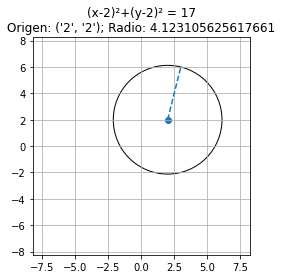

In [ ]:
círculo_1 = Circunferencia()
círculo_1.from_radius_points((2, 2), (3, 6))

círculo_1.return_graph()

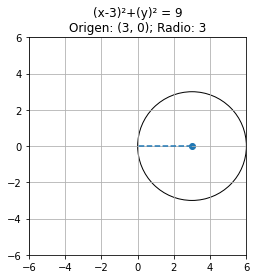

In [ ]:
círculo_2 = Circunferencia(y = 0, x = 0, r = 3)
círculo_2.get_center()
círculo_2.return_graph()


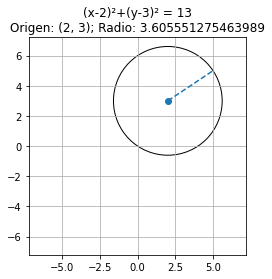

In [ ]:
círculo_3 = Circunferencia(x = 5, y = 5, h = 2, k = 3)
círculo_3.get_radius()
círculo_3.return_graph()

TALLER

Punto 1

In [ ]:
def graph_based_on_center_and_radius(h = 0, k = 0, x = 0, y = 0, r = 1, lim = 2):
  circle = Circunferencia()
  circle.from_radius_points((h, k), (h+r, k))
  return circle.return_graph(lim = lim)

A)

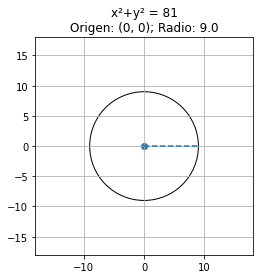

In [ ]:
círculo_1a = Circunferencia()
#x**2+y**2=9
círculo_1a.from_radius_points((0, 0), (9, 0))
círculo_1a.return_graph()

B)

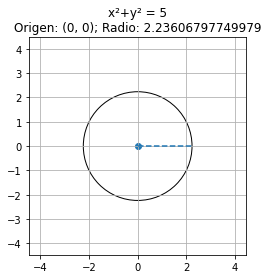

In [ ]:
graph_based_on_center_and_radius(r = 5**.5)

C)

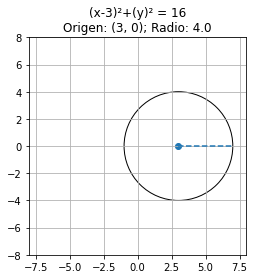

In [ ]:
graph_based_on_center_and_radius(h = 3, r = 16**.5)

D)

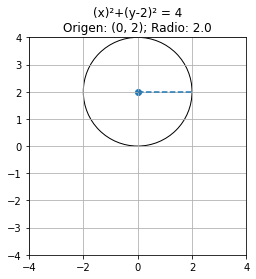

In [ ]:
graph_based_on_center_and_radius(k = 2, r = 2)

E)

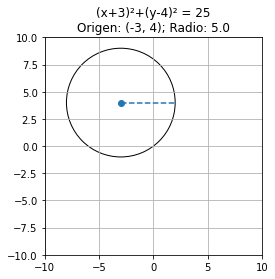

In [ ]:
graph_based_on_center_and_radius(h = -3, k = 4, r = 5)

F)

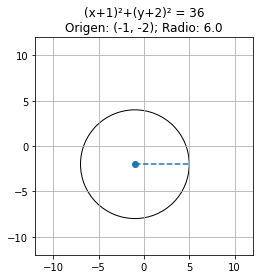

In [ ]:
graph_based_on_center_and_radius(h = -1, k = -2, r = 36**.5)

# 2)

a)

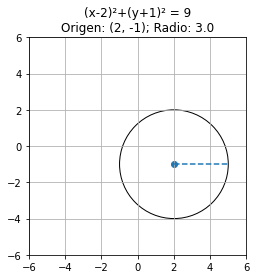

In [ ]:
graph_based_on_center_and_radius(h = 2, k = -1, r = 3)

b)

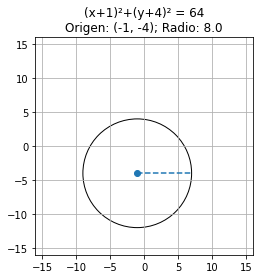

In [ ]:
graph_based_on_center_and_radius(h = -1, k=-4, r =8)

C)



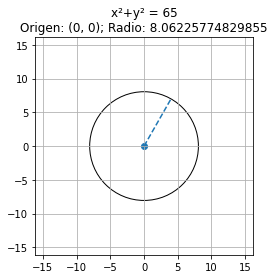

In [ ]:
círculo_2c = Circunferencia()
círculo_2c.from_radius_points((0, 0), (4, 7))
círculo_2c.return_graph()

d)

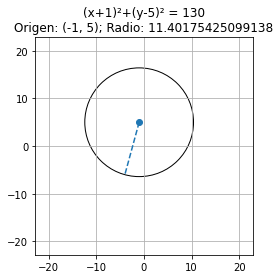

In [ ]:
círculo_2d = Circunferencia()
círculo_2d.from_radius_points((-1, 5), (-4, -6))
círculo_2d.return_graph()

e)

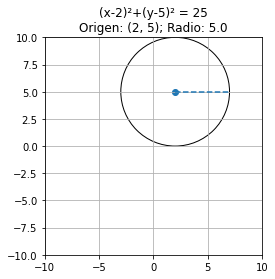

In [ ]:
centro = ((-1+5)/2, 10/2)
centro
h = ((-6)**2+(8)**2)**.5
graph_based_on_center_and_radius(h = int(centro[0]), k= int(centro[1]), r = h/2)

f)

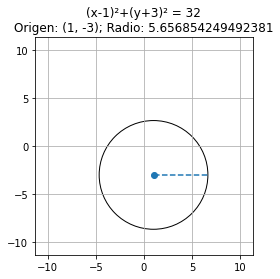

5.656854249492381
5.656854249492381


In [ ]:
centro = (-1+5/2, -5+3/2)
centro
h = ((7-(-1))**2+(3-(-5))**2)**.5
graph_based_on_center_and_radius(h = int(centro[0]), k= int(centro[1]), r = h/2)

g)

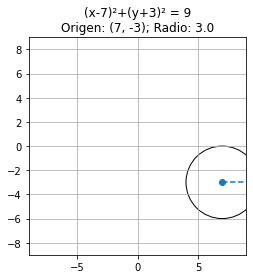

In [ ]:
graph_based_on_center_and_radius(h = 7, k= -3, r = 3)

h)

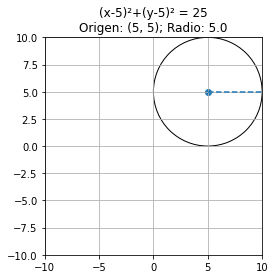

In [ ]:
graph_based_on_center_and_radius(h = 1*5, k= 1*5, r = 1*5)

# 3)

a)

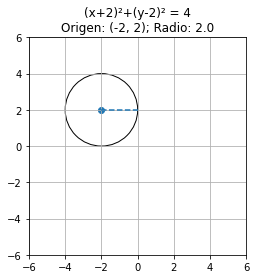

In [ ]:
graph_based_on_center_and_radius(h = -2, k= 2, r = 2)

b)

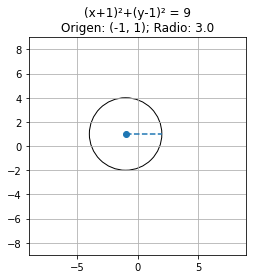

In [ ]:
graph_based_on_center_and_radius(h = -1, k= 1, r = 3)

# 4)

a)

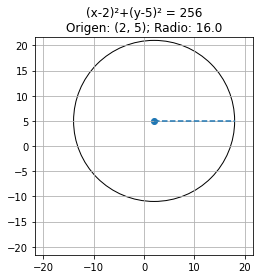

In [ ]:
círculo_4a = Circunferencia()
círculo_4a.solve(x_squared = 1, y_squared = 1, x = -4, y = 10, r = 13)
graph_based_on_center_and_radius(h = círculo_4a.h, k = círculo_4a.k, r = círculo_4a.r, lim = 1.35)

b)

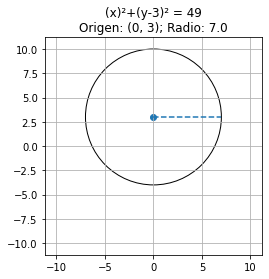

In [ ]:
círculo_4b = Circunferencia()
círculo_4b.solve(x_squared = 1, y_squared = 1, x = 0, y = 6, r = 2)
graph_based_on_center_and_radius(h = círculo_4b.h, k = círculo_4b.k, r = círculo_4b.r, lim = 1.6)

c)

In [ ]:
círculo_4c = Circunferencia()
círculo_4c.solve(x_squared = 1, y_squared = 1, x = -1/2, y = 1/2, r = 1/8)

#graph_based_on_center_and_radius(h = círculo_4b.h, k = círculo_4b.k, r = círculo_4b.r, lim = 1.6)

'La ecuación no corresponde a una circunferencia, dado que tiene radio 0.'

d)

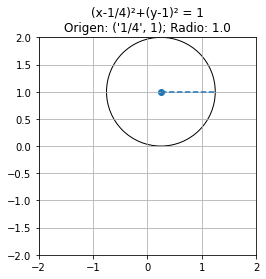

In [ ]:
círculo_4d = Circunferencia()
círculo_4d.solve(x_squared = 1, y_squared = 1, x = 1/2, y = 2, r = 1/16)
graph_based_on_center_and_radius(h = círculo_4d.h, k = círculo_4d.k, r = círculo_4d.r, lim = 2)

e)

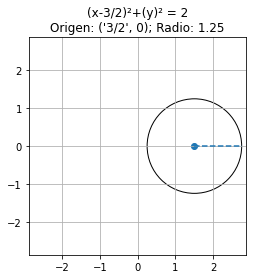

In [ ]:
círculo_4e = Circunferencia()
círculo_4e.solve(x_squared = 2, y_squared = 2, x = -3)
graph_based_on_center_and_radius(h = círculo_4e.h, k = círculo_4e.k, r = círculo_4e.r, lim = 2.3)

f)

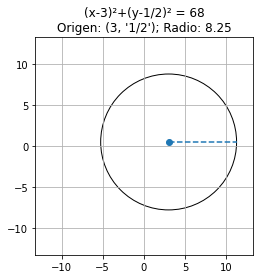

In [ ]:
círculo_4f = Circunferencia()
círculo_4f.solve(x_squared = 3, y_squared = 3, x = 6, y = 1)
graph_based_on_center_and_radius(h = círculo_4f.h, k = círculo_4f.k, r = círculo_4f.r, lim = 1.6)

# 5

a)

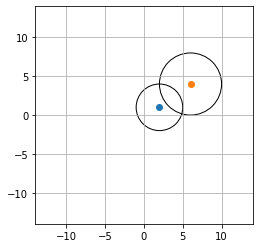

In [ ]:
pepe = Circunferencia()
pepe.return_graph(two_circles = True, c1 = {'h' : 2, 'k' : 1, 'r' : 9**.5, 'x' : 0, 'y' : 0}, c2 = {'h' : 6, 'k' : 4, 'r' : 16**.5, 'x' : 0, 'y' : 0})

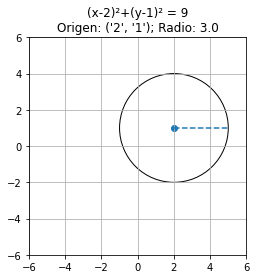

In [ ]:
graph_based_on_center_and_radius(h = 2, k = 1, r = 9**.5)

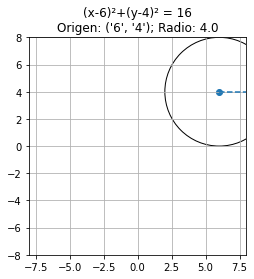

In [ ]:
graph_based_on_center_and_radius(h = 6, k = 4, r = 16**.5)

b)

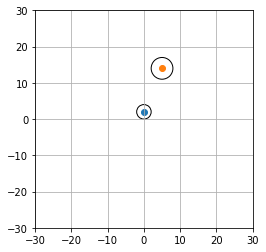

In [ ]:
pepe = Circunferencia()
pepe.return_graph(two_circles = True, c1 = {'h' : 0, 'k' : 2, 'r' : 4**.5, 'x' : 0, 'y' : 0}, c2 = {'h' : 5, 'k' : 14, 'r' : 9**.5, 'x' : 0, 'y' : 0}, lim = 6)

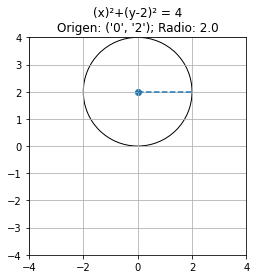

In [ ]:
graph_based_on_center_and_radius(h = 0, k = 2, r = 4**.5)

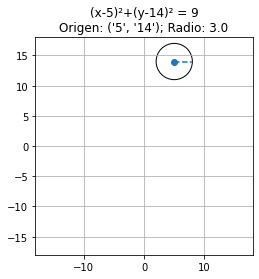

In [ ]:
graph_based_on_center_and_radius(h = 5, k = 14, r = 9**.5, lim = 6)

c)

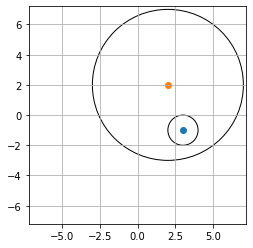

In [ ]:
pepe = Circunferencia()
pepe.return_graph(two_circles = True, c1 = {'h' : 3, 'k' : -1, 'r' : 1**.5, 'x' : 0, 'y' : 0}, c2 = {'h' : 2, 'k' : 2, 'r' : 25**.5, 'x' : 0, 'y' : 0}, lim = 1.2)

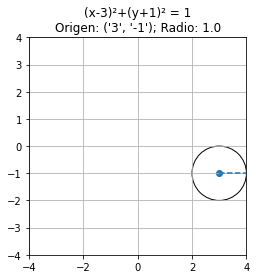

In [ ]:
graph_based_on_center_and_radius(h = 3, k = -1, r = 1**.5, lim = 4)

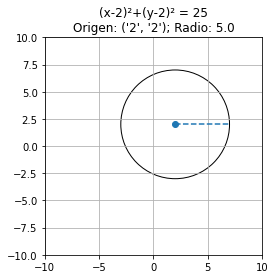

In [ ]:
graph_based_on_center_and_radius(h = 2, k = 2, r = 25**.5, lim = 2)